In [295]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
lenna1=img.imread('/home/kim/PycharmProjects/tensorflow2.0-gpu/donghwikim/imageclass/lenna.JPG')
lenna=lenna1[:,:,0]
print(lenna.shape)

(197, 196)


[[ -14.  -14.  -14.  -14.  -14.  -14.  -14.]
 [ -14.  -14.  -14.  -14.  -14.  -14.  -14.]
 [ -14.  -14.  -14.  -14.  -14.  -14.  -14.]
 [ -14.  -14.  -14. 1372.  -14.  -14.  -14.]
 [ -14.  -14.  -14.  -14.  -14.  -14.  -14.]
 [ -14.  -14.  -14.  -14.  -14.  -14.  -14.]
 [ -14.  -14.  -14.  -14.  -14.  -14.  -14.]] 700.0
0.9999999999999998


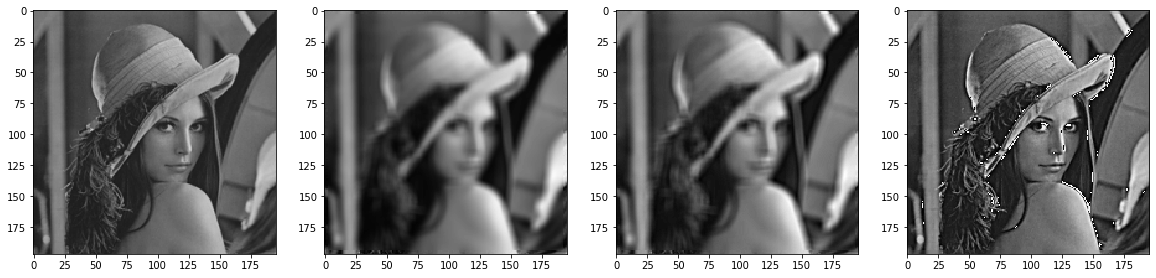

In [42]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

lenna1 = img.imread('/home/kim/PycharmProjects/tensorflow2.0-gpu/donghwikim/imageclass/lenna.JPG')
lenna = lenna1[:, :, 0]

mask_size = 7
medium = mask_size // 2

mask1 = np.ones((mask_size, mask_size)) / mask_size ** 2
mask2 = -(mask_size*2) * (np.ones((mask_size, mask_size)))
mask2[medium, medium] = (np.sum(mask2) * -1) * 2
print(mask2,np.sum(mask2))
mask2 = mask2 / np.sum(mask2)
print(np.sum(mask2))
guard = int((mask_size - 1) / 2)

out = np.copy(lenna)
for i in range(guard, lenna.shape[0] - guard):
    for j in range(guard, lenna.shape[1] - guard):
        out[i, j] = np.sum(mask1 * lenna[i-guard:i + guard+1, j-guard:j + guard+1])

out1 = np.copy(out)
for i in range(guard, lenna.shape[0] - guard):
    for j in range(guard, lenna.shape[1] - guard):
        out1[i, j] = np.sum(mask2 * out[i-guard:i + guard+1, j-guard:j + guard+1])

out2=np.copy(lenna)
for i in range(guard, lenna.shape[0] - guard):
    for j in range(guard, lenna.shape[1] - guard):
        out2[i,j]=np.sum(mask2*lenna[i-guard:i + guard+1, j-guard:j + guard+1])


fig, axes = plt.subplots(1, 4, figsize=(20,20))

axes[0].imshow(lenna1, cmap='gray')  # 원본
axes[1].imshow(out, cmap='gray')  # 흐릿하게한것
axes[2].imshow(out1, cmap='gray')  # 흐릿하게 한거에서 선명하게
axes[3].imshow(out2,cmap='gray') #원본에서 선명하게